# 1. 単回帰  

In [ ]:
!pip install japanize-matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib

## 1.1. 回帰とは  

「夏になるとかき氷が食べたくなる」「寒くなると温かい鍋を食べたくなる」「雨が降るとお店の客足が鈍る」など、我々の生活や行動は気象と密接に連動している。気象庁は[気候リスク管理技術に関する調査（スーパーマーケット及びコンビニエンスストア分野）：販売促進策に2週間先までの気温予測を活用する](http://www.data.jma.go.jp/gmd/risk/taio_pos.html)という資料を公開し、気象情報の活用による効率的な在庫管理や商品陳列を紹介している。

ここでは、新規オープンする売店の店長になったつもりで、アイスクリームの在庫管理について考えてみたい。売店の店長としては、商品の在庫をあまり抱えたくない。在庫は売れれば利益となるが、その売店の資金がモノに変化したことになるため、在庫を抱えている間はキャッシュフローが減少する。アイスクリームには賞味期限がないため、売れるまで辛抱強く待てばよいと思われるかもしれないが、冷凍庫で保管するにも保管スペースとコストがかかる。また、最中アイスなどはサクサク感が大切なので、製造から時間が経過しすぎると、美味しさが損なわれ、売り物にならなくなってしまう。一方で、暑い日にアイスクリームが売れすぎて、在庫を切らしてしまうと、せっかくの商機を失ってしまうことになる。

<img src="fig/icecream-shop.svg" width="240px" />

そこで、気象とアイスクリームの売れ行きの関係を調べ、アイスクリームの在庫の量を調整することを検討したい。例えば、天気予報で最高気温が摂氏30度と予想された日のアイスクリームの売れ行きを推測できれば、それに合わせてアイスクリームの発注を増やしたり、商品を陳列するスペースを増やすことが可能である。ところが、その売店は新しく商売を始めたため、アイスクリームの売れ行きに関する過去の販売データを持ち合わせていない。

そこで、2011年から2020年の東京における

+ $x$: 最高気温（東京都の日最高気温の月平均）
+ $y$: アイスクリーム・シャーベットへの支出額（一つの世帯が支出する金額の月平均）

の関係データを用いて、最高気温からアイスクリーム・シャーベットの支出額（以降「支出額」と略す）を近似的に計算する式を求め、売れ行きの傾向を把握したい。以下は、[気象庁](https://www.data.jma.go.jp/gmd/risk/obsdl/index.php)と[総務省統計局](https://www.stat.go.jp/data/kakei/index.html)が公開している統計データを加工し、グラフ化したものである。


---

### 【補足】  

理解度upのため、データ数を減らして計算  


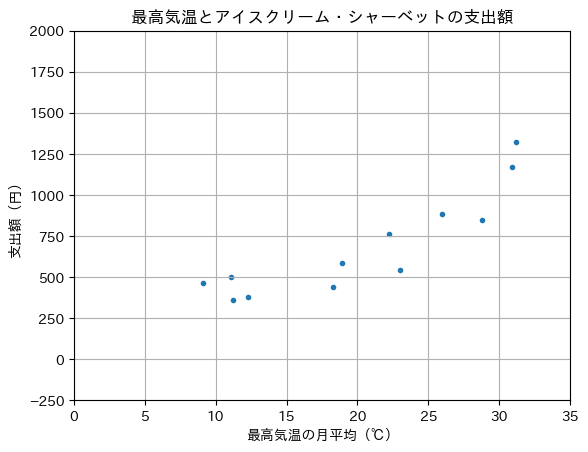

In [2]:
X = np.array([
        9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3, 11.1
    ])

Y = np.array([
        463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847., 542.,  441.,  499.
    ])

icecream_data = (X, Y)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='.')
ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
ax.set_xlabel('最高気温の月平均（℃）')
ax.set_ylabel('支出額（円）')
ax.set_xlim(0, 35)
ax.set_ylim(-250, 2000)
ax.grid()
fig.show()


---

オリジナル版  



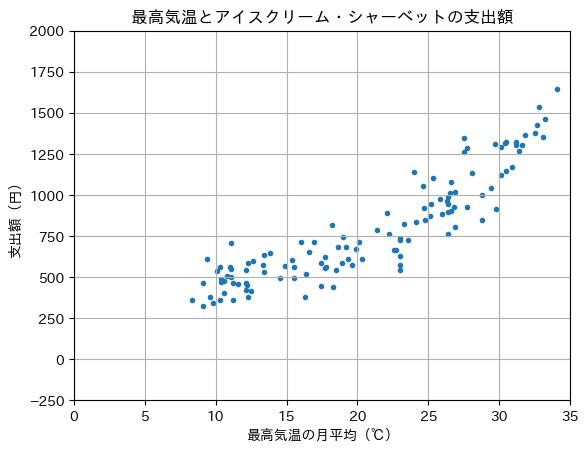

In [3]:
X = np.array([
     9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
    11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
    16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
    23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
    26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
    30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
    29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
    26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
    24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
    19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
    16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

Y = np.array([
    463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
    542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
   1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
    683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
    404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
    739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
   1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
    611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
    506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
    716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
   1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
    745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
    549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
    784.,  682.,  587.])

icecream_data = (X, Y)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='.')
ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
ax.set_xlabel('最高気温の月平均（℃）')
ax.set_ylabel('支出額（円）')
ax.set_xlim(0, 35)
ax.set_ylim(-250, 2000)
ax.grid()
fig.show()

グラフから２次関数や指数関数の形が思い浮かぶが、まずは最も単純な場合として、最高気温（$x \in \mathbb{R}$）と支出額（$y \in \mathbb{R}$）の関係を１次関数にフィッティングさせる（当てはめる）ことを考える。
すなわち、１次関数の一般形、

<a id="f1-1"></a>
(1.1)  

$$
\begin{align}
y = f_{a,b}(x) = ax + b
\end{align}
$$

を仮定し、$x$と$y$の関係を最も適切に表現するように、傾き$a \in \mathbb{R}$と切片$b \in \mathbb{R}$を決定したい。１次関数の一般形は$a$と$b$の値を変えることで無数の関数を表現できる（下図参照）。１次関数の一般形のように、説明したい対象（この場合はアイスクリーム・シャーベットの支出額）の形や構造を抽象化したものを**モデル**（model）と呼ぶ。モデルの中で説明したい対象を定量的に表現する変数（１次関数の一般形の例では$a$と$b$）を**パラメータ**（parameter）と呼ぶ。データに合うようにモデルのパラメータ（この場合は$a$と$b$）を求めることを**パラメータ推定**（parameter estimation）と呼ぶ。

---

- 実数  
  変数xが実数であることを$x \in \mathbb{R}$と表現する（$\mathbb{R}$は実数の集合）。

![image](fig/zissu-zukei1.png)  



- 関数の添字  
  関数$f$は3つの変数$a, b, x$から構成されるが、変数$a$と$b$は関数$f$の挙動を決定するパラメータであり、変数$x$に対しては定数を見なすことができる。したがって、$a$と$b$を下付きの添字で明示したうえで、$f$は$x$の関数であることを表現している。

---


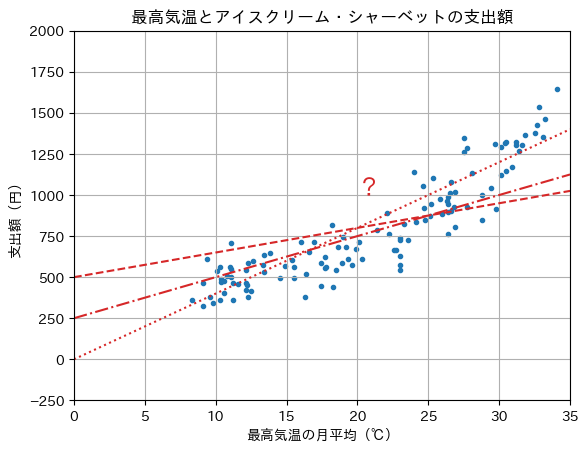

In [4]:
X = np.array([0, 35])
fig, ax = plt.subplots(dpi=100)
ax.scatter(icecream_data[0], icecream_data[1], marker='.')
ax.plot(X, 15 * X + 500, ls='--', color='tab:red')
ax.plot(X, 25 * X + 250, ls='-.', color='tab:red')
ax.plot(X, 40 * X + 0, ls='dotted', color='tab:red')
ax.text(20, 1000, '？', color='tab:red', fontsize=16)
ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
ax.set_xlabel('最高気温の月平均（℃）')
ax.set_ylabel('支出額（円）')
ax.set_xlim(0, 35)
ax.set_ylim(-250, 2000)
ax.grid()
fig.show()

ところで、人間は外気温が高くなるとアイスクリームやシャーベットなどの冷たいものを食べたくなる。
逆に、人間がアイスクリームやシャーベットを食べるから、外気温が上昇すると考えるのは不自然である。

![icecream](fig/icecream.png "暑いとアイスクリームを食べたくなる")

ゆえに、最高気温からアイスクリーム・シャーベットの支出額の方向に因果関係があると考える。そこで、最高気温で支出額を説明することを考える。
支出額$y$のように、説明したい変数は**目的変数**（target variable）や**被説明変数**（explained variable）、**従属変数**（dependent variable）などと呼ばれる。
また、最高気温$x$のように、目的変数を説明するための変数は**説明変数**（explanatory variable）や**独立変数**（independent variable）などと呼ばれる。
連続値をとる目的変数を説明変数で表現することを**回帰**（regression）と呼ぶ。
１次関数へのフィッティングのように、説明変数が１つの回帰を**単回帰**（simple regression）と呼び、単回帰によって求められた直線を**回帰直線**（regression line）と呼ぶ。
説明変数が２つ以上の回帰を**重回帰**（multiple regression）と呼び、次章以降で取り扱う。

ところで、回帰は目的変数が数値で表される問題であれば、様々な局面で応用できる。

+ 採用予定の従業員の学歴、スキル、経験などから妥当な年俸額を算定する
+ 地価、最寄り駅からの距離、築年数、床面積、間取りなどから妥当な家賃を算定する
+ 最寄り駅、最寄り駅からの距離、周辺の人口などから、出店時の売上高を予想する
+ 職業、年齢、年収、勤続年数、貯蓄額などから与信限度額を算定する
+ テレビ、ラジオ、インターネットなどに配信した広告に対する支出が売上高に与える影響を検証する
+ あるエリアにおいて使われていた携帯電話の台数から、そのエリアの滞在人口を推定する

なお、最後に挙げた例では、人間が携帯電話の位置を動かしているので、滞在人口から携帯電話の台数の方向に因果関係があると考えるべきである。ところが、この回帰分析では説明変数が滞在人口（因果関係における原因側）となっている。滞在人口は直接観測する（数える）のが難しいため、基地局やGPSなどで携帯電話の台数を観測することにして、携帯電話の台数を説明変数、滞在人口を目的変数としている。

## 1.2. データの表現  

先ほどの例は観測点が多いため、まずは簡単な例として以下のグラフで示された関係を考える。これは$x$を説明変数、$y$を目的変数として、$xy$平面上の4点$(1, 3), (3, 6), (6, 5), (8, 7)$で構成されている。

In [5]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

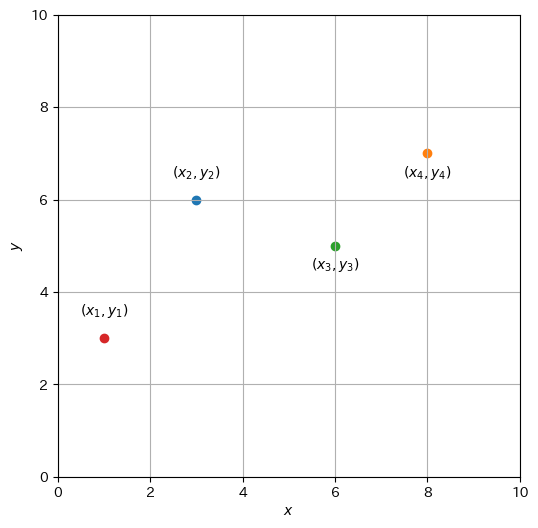

In [6]:
colormap = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
offset_y = [0.5, 0.5, -0.5, -0.5]
xmin, xmax = 0, 10
ymin, ymax = 0, 10

def init_graph(dpi=100, grid=True):
    fig, ax = plt.subplots(dpi=dpi, figsize=(6, 6))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect('equal')
    if grid:
        ax.grid()
    return fig, ax

def plot_data(ax, D, offset_y=None, marker='o'):
    A = []
    for i, row in enumerate(D):
        A.append(ax.scatter(D[i,0], D[i,1], marker=marker, color=colormap[i]))
        if offset_y is not None:
            A.append(ax.text(D[i,0], D[i,1] + offset_y[i], f'$(x_{i+1}, y_{i+1})$', ha='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plt.show()

ここでは、説明変数と目的変数の一つの組を**事例**（instance）として表現する。１個以上の事例をまとめたものを**データ**（data）と呼ぶ。
$1$番目の事例を$(x_1, y_1)$、$2$番目の事例を$(x_2, y_2)$、$i$番目の事例を$(x_i, y_i)$と表すことにすると、$N$個の事例からなるデータ$\mathcal{D}$は次のように表される。


<a id="f1-2"></a>
(1.2)  

\begin{align}
\mathcal{D} = \left\{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\right\} = \left\{(x_i, y_i)\right\}_{i=1}^{N}
\end{align}

先ほどのグラフの例（$N=4$）のデータ$\mathcal{D}_{s}$は次のように表現される。


<a id="f1-3"></a>
(1.3)  

\begin{align}
\mathcal{D}_s = \left\{(x_i, y_i)\right\}_{i=1}^{4} = \left\{(1, 3), (3, 6), (6, 5), (8, 7)\right\}
\end{align}

データの説明変数$x$と目的変数$y$を対応付ける関数$y=f(x)$を回帰で求めることは、**訓練データ**（supervision data）（もしくは**学習データ**（training data）とも呼ばれる）を用いて、関数$y = f(x)$を**教師あり学習**（supervised learning）で求めると見なすことができる。関数を学習することで、説明変数と目的変数を対応付けるメカニズムの理解が深まるとともに、訓練データには無かった新しい事例（説明変数の値）に対し、その出力（目的変数の値）を予測することに役立つかもしれない。

## 1.3. 残差  

1次関数のモデル$f_{a,b}(x) = ax + b$に、傾き$a$と切片$b$を何らかの値に設定した状況を考える。$x$を与えたとき、傾き$a$と切片$b$で決定された1次関数から計算される値を$\hat{y} \in \mathbb{R}$と書くことにする。説明変数$x_i$に対して、目的変数の実測値$y_i$と、1次関数$f_{a,b}(x_i)$で近似的に計算された理論値$\hat{y}_i$をハット（^）の有無で区別していることに注意されたい。


<a id="f1-4"></a>
(1.4)  

\begin{align}
\hat{y} = f_{a,b}(x) = ax + b
\end{align}

例えば、$a = 1, b = 1$として$y=ax+b$の回帰直線を考える。データ$\mathcal{D}_s$の各点$(x_i, y_i)$と、回帰で計算された点$(x_i, \hat{y}_i)$をプロットすると、以下のようになる。

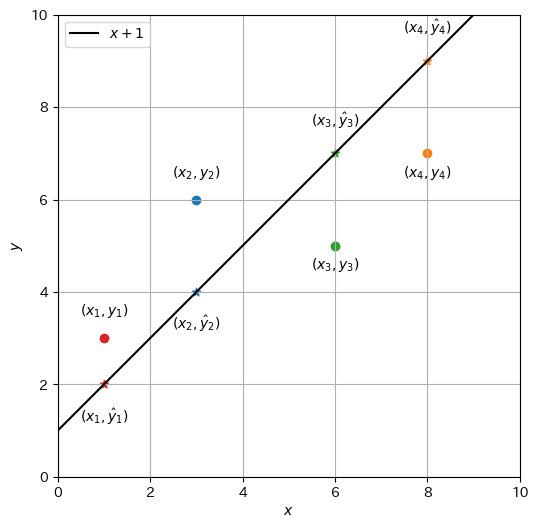

In [7]:
offset_hat_y = [-0.8, -0.8, 0.6, 0.6]

def plot_line(ax, a, b, label=None, color='black'):
    if label is None:
        label = f'${a}x + {b}$' if a != 1 else f'$x + {b}$'
    x = np.array([xmin, xmax])
    return ax.plot(x, a * x + b, color, ls='-', label=label)

def plot_hat_y(ax, D, a, b, offset_hat_y, marker='*', show_text=True):
    A = []
    for i, row in enumerate(D):
        x = D[i,0]
        hat_y = a * x + b
        A.append(ax.scatter(x, hat_y, marker=marker, color=colormap[i]))
        if show_text:
            A.append(ax.text(x, hat_y + offset_hat_y[i], f'$(x_{i+1}, \\hat{{y}}_{i+1})$', ha='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plot_line(ax, 1, 1)
plot_hat_y(ax, D, 1, 1, offset_hat_y)
plt.legend(loc='upper left')
plt.show()

さて、設定した$a$と$b$がどのくらいデータ$\mathcal{D}$をうまく反映しているのか測定したい。そこで、データ$\mathcal{D}$中に含まれる各点$(x_i, y_i)$に関して、1次関数$\hat{y}_i = f_{a,b}(x_i) = ax_i + b$で近似した場合の**残差**（residual）$\epsilon_i \in \mathbb{R}$を次のように定義する。


<a id="f1-5"></a>
(1.5)  

\begin{align}
\epsilon_i = y_i - \hat{y}_i = y_i - (ax_i + b)
\end{align}

この残差$\epsilon_i$は、プロットされた点から回帰直線まで、$y$軸方向に差を取ったものである。例えば、データ$\mathcal{D}_s$に対して$a = 1, b = 1$としたとき、


<a id="f1-6"></a>
(1.6)  

\begin{align}
\epsilon_1 &= 3 - (1 \cdot 1 + 1) = 1 \\
\epsilon_2 &= 6 - (1 \cdot 3 + 1) = 2 \\
\epsilon_3 &= 5 - (1 \cdot 6 + 1) = -2 \\
\epsilon_4 &= 7 - (1 \cdot 8 + 1) = -2
\end{align}

以下に、各点の$\epsilon_i$を点線で示した。

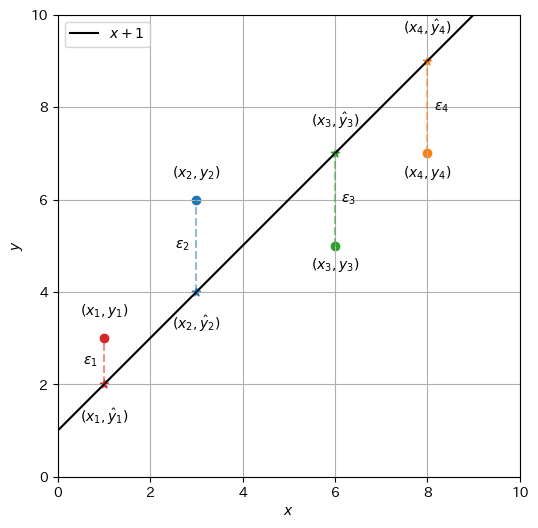

In [8]:
offset_epsilon = [-0.3, -0.3, 0.3, 0.3]

def plot_error(plt, ax, D, a, b, offset_epsilon=None):
    A = []
    for i, row in enumerate(D):
        x, y = row
        y_hat = a * x + b
        ymin = min(y, y_hat)
        ymax = max(y, y_hat)
        A.append(plt.vlines([x], ymin, ymax, linestyles='dashed', color=colormap[i], alpha=0.5))
        if offset_epsilon is not None:
            A.append(ax.text(x + offset_epsilon[i], (ymin + ymax) / 2, f'$\epsilon_{i+1}$', ha='center', va='center'))
    return A

fig, ax = init_graph()
plot_data(ax, D, offset_y)
plot_line(ax, 1, 1)
plot_hat_y(ax, D, 1, 1, offset_hat_y)
plot_error(plt, ax, D, 1, 1, offset_epsilon)
plt.legend(loc='upper left')
plt.show()

各点における残差$\epsilon_i$を定義したので、次はデータ$\mathcal{D}$全体の残差を定義し、設定した$a$と$b$がどのくらいデータ$\mathcal{D}$をうまく反映しているのか、定量的に表現したい。ここで、各点の残差の平均$\frac{1}{N}\sum_{i=1}^N \epsilon_i$を計算してしまうと、正と負の残差が相殺してしまう。ところが、各点の残差の絶対値の平均$\frac{1}{N}\sum_{i=1}^N |\epsilon_i|$を取ると、数学的な取り扱いが煩雑になる。ここでは、**平均二乗残差** (MSR: Mean Square Residual) を用いる。


<a id="f1-7"></a>
(1.7)  

$$
\begin{align}
\hat{L} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i=1}^{N} \left\{y_i - (ax_i + b)\right\}^2
\end{align}
$$

ちなみに、先ほどのデータ$\mathcal{D}_s$に対する１次関数$y = x + 1$の平均二乗残差は、


<a id="f1-8"></a>
(1.8)  

\begin{align}
\hat{L} = \frac{1}{4} \sum_{i=1}^{4} \epsilon_i^2 = \frac{1}{4} \left\{1^2 + 2^2 + (-2)^2 + (-2)^2\right\} = \frac{13}{4}
\end{align}

なお、平均二乗残差は平均二乗誤差（MSE: Mean Square Error）と呼ばれることも多い。


---

### 【補足】  

- MSR/MSEとは：「予測値と観測値の差（＝残差）」を二乗し、その総和をデータ数で割った値（＝平均値）  
  算出された値は二乗されているので、感覚的に分かりにくい  


- 二乗する理由  
  各データの値は＋のみになる　例）-2^2=4  
  絶対値だと計算(微分)できない場合がある  
  データの条件により、比較が難しい場合がある → 二乗することで、バラツキがより大きくなる  
  二乗 = 正方形の面積で差異を表す  


- 参考：RMSE(Root Mean Squared Error)  
  MSR/MSEの結果に対するルート（√）を算出  
  二乗された値を戻すことで、人の感覚に近い値を得られる  


- 最確値とは：ある量を「何回も」測定し、「最も真の値に近い」平均値を算出  


- 残差とは：最確値と観測値の差  
  最確値は計算式で算出可能 ＝ 予測できる  


- 誤差とは：真の値と観測値の差  
  真の値は予測できない、高い精度で観測された値  



---


## 1.4. 平均二乗残差は$a,b$の関数  

これまでの議論では、傾き$a$と切片$b$に具体的な値を与えていたが、$a$と$b$の値を変えることで異なる回帰直線を描画できる。以下は、$a$と$b$の値を変えながら回帰直線を描画するアニメーションである。$a$と$b$の値により回帰直線が決定され、その回帰直線がデータ点に近い所を通るとき、平均二乗残差（MSR）の値が小さくなる。

In [9]:
B = np.linspace(0, 6, 13)
A = np.linspace(0, 1, 21)

fig, ax = init_graph(grid=False)
plot_data(ax, D)

best = (None, None, None)
artists = []
for b in B:
    for a in A:
        # Update the best parameter if necessary.
        c = 'black'
        msr = ((D[:,1] - a * D[:,0] - b) ** 2).mean()
        if best[0] is None or msr < best[0]:
            best = (msr, a, b)
            c = 'red'

        # Draw lines with the current and best parameters.
        artist = []
        artist += plot_line(ax, best[1], best[2], color='pink')
        artist += plot_line(ax, a, b, color=c)
        artist += plot_hat_y(ax, D, a, b, offset_hat_y, show_text=False)
        artist += plot_error(plt, ax, D, a, b)        
        msg = f"$a$ = {a:.2f}, $b$ = {b:.1f}: MSR = ${msr:.2f}$"
        msg2 = "(Current best: $a$ = {0[1]:.2f}, $b$ = {0[2]:.1f}: MSR = ${0[0]:.2f}$)".format(best)
        artist.append(ax.text(5, 0.6, msg + '\n' + msg2, color=c, ha='center'))
        artists.append(artist)

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=150)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

教師あり学習では、学習データ$\mathcal{D}$が与えられ、その学習データをよく反映するパラメータを求める。したがって、式[(1.7)](#f1-7)は学習事例$(x_i, y_i) \in \mathcal{D}$を定数とした、パラメータ$a$と$b$の関数と見なすことができる。そこで、平均二乗残差を変数$a, b$の関数として整理してみる。


<a id="f1-9"></a>
(1.9)  

$$
\begin{align}
\hat{L}_{\mathcal{D}}(a,b) &= \frac{1}{N} \sum_{i=1}^{N} \left\{y_i - (ax_i + b)\right\}^2 \\
&= \frac{1}{N} \sum_{i=1}^{N} \left\{y_i^2 - 2y_i(ax_i + b) + (ax_i + b)^2\right\} \\
&= \frac{1}{N} \sum_{i=1}^{N} (y_i^2 - 2y_i ax_i - 2y_i b + a^2x_i^2 + 2abx_i + b^2) \\
&= \frac{1}{N} \sum_{i=1}^{N} y_i^2 - 2a \frac{1}{N} \sum_{i=1}^{N} x_i y_i - 2b \frac{1}{N} \sum_{i=1}^{N} y_i + a^2 \frac{1}{N} \sum_{i=1}^{N} x_i^2 + 2ab \frac{1}{N} \sum_{i=1}^{N} x_i + b^2 \\
&= \overline{y^2} - 2a \overline{xy} - 2b \overline{y} + a^2 \overline{x^2} + 2ab \overline{x} + b^2 \\
&= \overline{x^2}a^2 + b^2 + 2\overline{x}ab - 2\overline{xy}a - 2\overline{y}b + \overline{y^2} \\
\end{align}
$$

ここで、$\bar{x}$や$\bar{y}$などは学習データ$\mathcal{D}$における各変数の標本平均である。説明変数の確率変数を$\mathcal{X}$、目的変数の確率変数を$\mathcal{Y}$で表すことにすると、


<a id="f1-10"></a>
(1.10)  

$$
\begin{eqnarray}
\overline{x} &= \mathbb{E}[\mathcal{X}] = \frac{1}{N} \sum_{i=1}^{N} x_i \\
\overline{y} &= \mathbb{E}[\mathcal{Y}] = \frac{1}{N} \sum_{i=1}^{N} y_i \\
\overline{x^2} &= \mathbb{E}[\mathcal{X}^2] = \frac{1}{N} \sum_{i=1}^{N} x_i^2 \\
\overline{y^2} &= \mathbb{E}[\mathcal{Y}^2] = \frac{1}{N} \sum_{i=1}^{N} y_i^2 \\
\overline{xy} &= \mathbb{E}[\mathcal{XY}] = \frac{1}{N} \sum_{i=1}^{N} x_i y_i
\end{eqnarray}
$$

以上のことから、平均二乗残差$\hat{L}_{\mathcal{D}}(a,b)$は$a$と$b$に関する２次関数で、その関数はデータ$\mathcal{D}$から統計的に求まる値によって決定されることが分かる。$a$を横軸、$b$を縦軸として$\hat{L}_\mathcal{D}(a, b)$の値をヒートマップで描画してみると、$(a, b) \approx (0.5, 3)$付近で平均二乗残差が最小になりそうであることが分かる。実際、$\hat{L}_\mathcal{D}(a, b)$は凸関数であり、その値を最小にする$a, b$が存在する（$\hat{L}_\mathcal{D}(a, b)$が凸関数であることは次章で証明する）。


---

### 【補足】凸関数  
高校の数学では、上に凸な関数（凹関数）と下に凸な関数（凸関数）などと呼ばれている。本資料では、単に「凸関数」というと、下に凸な関数を指す。

---

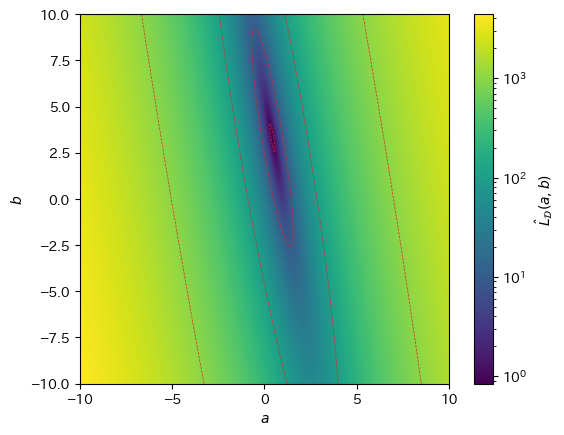

In [10]:
def msr(a, b, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    x2m = np.mean(D[:,0] ** 2)
    y2m = np.mean(D[:,1] ** 2)
    xym = np.mean(D[:,0] * D[:,1])
    return x2m * (a ** 2) + b ** 2 + 2 * xm * a * b - 2 * xym * a - 2 * ym * b + y2m

N = 1000
A, B = np.meshgrid(np.linspace(-10, 10, N), np.linspace(-10, 10, N))
J = msr(A, B, D)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')

# Draw a heat map on a logarithmic scale of MSR.
mesh = ax.pcolormesh(A, B, J, norm=matplotlib.colors.LogNorm(vmin=J.min(), vmax=J.max()), shading='auto')
cbar = fig.colorbar(mesh)
cbar.set_label('$\hat{L}_{\mathcal{D}}(a,b)$')

# Draw a contour map (clip loss values not to draw lines in smaller area)
ax.contour(
    A, B, np.clip(J, 1e-3, None), vmin=1, colors='tab:red', linewidths=0.5, linestyles='dashed',
    norm=matplotlib.colors.LogNorm(vmin=J.min(), vmax=J.max()))

plt.show()

以降では、平均二乗残差を最小化するパラメータを求める方法を説明する。平均二乗残差のように、モデルの予測値と正解値（実測値）とのずれを計測する関数を、**損失関数**（loss function）と呼ぶ。したがって、今回の単回帰モデルの学習は、「平均二乗残差で定義される損失関数を最小化することにより、単回帰モデルのパラメータを推定する」と整理することができる。なお、機械学習や数理最適化において最小化や最大化の対象となる関数を**目的関数**（objective function）と呼ぶ。しばしば、損失関数のことを目的関数と言い換えることがあるが、損失関数よりも目的関数の方がより広い概念を表す。また、二乗和で表現される目的関数を最小化することで、パラメータを求める方法のことを**最小二乗法**（least squares）と呼ぶ。

## 1.5. 平均二乗残差を最小化する  

---

### 【補足】  

先に結論を書いておく  


最小二乗法による回帰係数の計算  
`回帰直線：Y = aX + b`  
- X：xの平均  
- Y：yの平均  
- 傾き：a = x と yの共分散 / x の分散  
- 切片：b = Y - aX  


xの偏差  
- 算出方法：x - X  


yの偏差  
- 算出方法：y - Y  


xの分散  
- 算出方法①：「xの偏差 を 二乗」の平均  
- 算出方法② (公式)：「xの二乗」の平均 - 「Xの二乗」  


xとyの共分散  
- 算出方法①：「xの偏差 × yの偏差」の平均  
- 算出方法② (公式)：「x × y」の平均 - XY  


---

これまでの議論により、データ$\mathcal{D}$を1次関数で近似的に表現するための傾き$a$と切片$b$を求める問題は、以下の目的関数（平均二乗残差）を最小にする$a$と$b$の推定値を求める問題に帰着した。


---

### 【ポイント】単回帰の目的関数（平均二乗残差）  


<a id="f1-11"></a>
(1.11)  

$$
\begin{align}
\hat{L}_{\mathcal{D}}(a,b) = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - \hat{y}_i\right)^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - ax_i - b)^2
\end{align}
$$


---

### 【補足】  
最小二乗法で求める$a, b$の推定値を$\hat{a}, \hat{b}$と区別して書くことがあるが、表記が複雑になるため、以降の導出ではハットを付けず、$a, b$のまま説明する。


---

まず、目的関数を最小にする$b$を求めるため、式[(1.11)](#f1-11)（目的関数）を$b$で偏微分する。


<a id="f1-12"></a>
(1.12)  

$$
\begin{align}
\frac{\partial \hat{L}_{\mathcal{D}}(a,b)}{\partial b} &= \frac{1}{N} \sum_{i=1}^N 2 \cdot (y_i - ax_i - b) \cdot (-1) 
= -2 \cdot \frac{1}{N}\sum_{i=1}^N (y_i - ax_i - b)
\end{align}
$$


これを$0$とおくと、


<a id="f1-13"></a>
(1.13)  

$$
\frac{1}{N}\sum_{i=1}^N (y_i - ax_i - b) = 0
$$


なお、以降の式展開において都合がよいので、$\frac{1}{N}$を残している。$b$を求めるために式変形を続けると、


<a id="f1-14"></a>
(1.14)  

$$
\begin{align}
\frac{1}{N}\sum_{i=1}^N (y_i - ax_i - b) &= 0　\\
\frac{1}{N}\sum_{i=1}^N y_i - a\cdot\frac{1}{N}\sum_{i=1}^N x_i - \frac{1}{N}\sum_{i=1}^N b &= 0 \\
b &= \frac{1}{N}\sum_{i=1}^N y_i - a\cdot\frac{1}{N}\sum_{i=1}^N x_i
\end{align}
$$


ここで、式[(1.10)](#f1-10)で定義した平均の記法で表すと、


---

### 【ポイント】単回帰の切片$b$を求める式  


<a id="f1-15"></a>
(1.15)  

$$
b = \overline{y} - a\overline{x}
$$


---

次に、目的関数を最小にする$a$を求めるため、式[(1.11)](#f1-11)（目的関数）を$a$で偏微分する。


<a id="f1-16"></a>
(1.16)  

$$
\begin{align}
\frac{\partial \hat{L}_{\mathcal{D}}(a,b)}{\partial a} &= \frac{1}{N}\sum_{i=1}^N 2 \cdot (y_i - ax_i - b) \cdot (-x_i)
= -2 \cdot \frac{1}{N}\sum_{i=1}^N x_i (y_i - ax_i - b)
\end{align}
$$


これを$0$とおくと、


<a id="f1-17"></a>
(1.17)  

$$
\frac{1}{N}\sum_{i=1}^N x_i (y_i - ax_i - b) = 0
$$


今回も、以降の式展開において都合がよいので、$\frac{1}{N}$を残している。$a$を求めるために式変形を続けると、


<a id="f1-18"></a>
(1.18)  

$$
\begin{align}
\frac{1}{N}\sum_{i=1}^N x_i (y_i - ax_i - b) &= 0 \\
\frac{1}{N}\sum_{i=1}^N (x_i y_i - ax_i^2 - bx_i) &= 0 \\
\frac{1}{N}\sum_{i=1}^N x_i y_i -a \cdot \frac{1}{N}\sum_{i=1}^N x_i^2 -b\frac{1}{N}\sum_{i=1}^N x_i &= 0
\end{align}
$$


ここで、式[(1.10)](#f1-10)で定義した平均の記法を導入すると、


<a id="f1-19"></a>
(1.19)  

$$
\begin{align}
\overline{xy} -a\overline{x^2} -b\overline{x} = 0
\end{align}
$$


$b$に式[(1.15)](#f1-15)を代入し、$a$について解くと、


<a id="f1-20"></a>
(1.20)  

$$
\begin{align}
\overline{xy} -a\overline{x^2} -(\overline{y} - a\overline{x})\overline{x} &= 0 \\
\overline{xy} -a\overline{x^2} -(\overline{x})(\overline{y}) + a(\overline{x})^2 &= 0 \\
a &= \frac{(\overline{x})(\overline{y}) - \overline{xy}}{(\overline{x})^2 - \overline{x^2}} = \frac{\overline{xy} - (\overline{x})(\overline{y})}{\overline{x^2} - (\overline{x})^2}
\end{align}
$$


ところで、確率変数$\mathcal{X}$と$\mathcal{Y}$の共分散は、


<a id="f1-21"></a>
(1.21)  

$$
\begin{align}
\mathrm{Cov}[\mathcal{X},\mathcal{Y}] &= \mathbb{E}\left[(\mathcal{X} - \mathbb{E}[\mathcal{X}])(\mathcal{Y} - \mathbb{E}[\mathcal{Y}])\right] \\
&= \mathbb{E}\left[(\mathcal{XY} - \mathcal{X}\mathbb{E}[\mathcal{Y}] - \mathbb{E}[\mathcal{X}]\mathcal{Y} + \mathbb{E}[\mathcal{X}]\mathbb{E}[\mathcal{Y}])\right] \\
&= \mathbb{E}[\mathcal{XY}] - \mathbb{E}[\mathcal{X}]\mathbb{E}[\mathcal{Y}] - \mathbb{E}[\mathcal{X}]\mathbb{E}[\mathcal{Y}] + \mathbb{E}[\mathcal{X}]\mathbb{E}[\mathcal{Y}] \\
&= \mathbb{E}[\mathcal{XY}] - \mathbb{E}[\mathcal{X}]\mathbb{E}[\mathcal{Y}] \\
&= \overline{xy} - (\overline{x})(\overline{y})
\end{align}
$$


また、確率変数$\mathcal{X}$の分散は、


<a id="f1-22"></a>
(1.22)  

$$
\begin{align}
\mathrm{Var}[\mathcal{X}] = \mathrm{Cov}[\mathcal{X},\mathcal{X}] = \overline{xx} - (\overline{x})(\overline{x}) = \overline{x^2} - (\overline{x})^2
\end{align}
$$


したがって、


---

### 【ポイント】単回帰の傾き$a$を求める式  


<a id="f1-23"></a>
(1.23)  

$$
a = \frac{\overline{xy} - (\overline{x})(\overline{y})}{\overline{x^2} - (\overline{x})^2} = \frac{\mathrm{Cov}[\mathcal{X},\mathcal{Y}]}{\mathrm{Cov}[\mathcal{X}, \mathcal{X}]} = \frac{\mathrm{Cov}[\mathcal{X},\mathcal{Y}]}{\mathrm{Var}[\mathcal{X}]}
$$


---

### 1.5.1. 実際に$a$と$b$を求めてみる

さて、例として用いているデータ$\mathcal{D}_s$


<a id="f1-24"></a>
(1.24)  

$$
\begin{align}
\mathcal{D}_s = \left\{(x_i, y_i)\right\}_{i=1}^{4} = \left\{(1, 3), (3, 6), (6, 5), (8, 7)\right\}
\end{align}
$$


に対して、$a$と$b$を求める。まず、データ$\mathcal{D}_s$に対して必要な統計量を求める。

$$
\begin{align*}
\overline{x} &= \frac{1}{4} \sum_{i=1}^4 x_i = \frac{1 + 3 + 6 + 8}{4} = 4.5 \\
\overline{y} &= \frac{1}{4} \sum_{i=1}^4 y_i = \frac{3 + 6 + 5 + 7}{4} = 5.25 \\
\mathrm{Cov}[\mathcal{X},\mathcal{Y}] &= \frac{1}{4} \sum_{i=1}^4 (x_i - \overline{x})(y_i - \overline{y}) \\
&= \frac{(1-4.5)(3-5.25) + (3-4.5)(6-5.25) + (6-4.5)(5-5.25) + (8-4.5)(7-5.25)}{4} \\
&= 3.125 \\
\mathrm{Var}[\mathcal{X}] &= \frac{1}{4} \sum_{i=1}^4 (x_i - \overline{x})^2 \\
&= \frac{(1-4.5)^2 + (3-4.5)^2 + (6-4.5)^2 + (8-4.5)^2}{4} \\
&= 7.25
\end{align*}
$$


この計算結果から、最小二乗法による回帰直線の傾きと切片の推定値$a$と$b$は、次のように求めることができる。


<a id="f1-25"></a>
(1.25)  

$$
\begin{align}
a &= \mathrm{Cov}[\mathcal{X},\mathcal{Y}] / \mathrm{Var}[\mathcal{X}] = 3.125 / 7.25 \fallingdotseq 0.431 \\
b &= \overline{y} - a \overline{x} = 5.25 - 0.431 \times 4.5 \fallingdotseq 3.310
\end{align}
$$


したがって、最小二乗法で求まる回帰直線は$\hat{y} = 0.431x + 3.310$である。データ$\mathcal{D}_s$と一緒にプロットしたグラフを作成してみると、$a=1, b=1$の時よりも残差が減少していることが分かる。



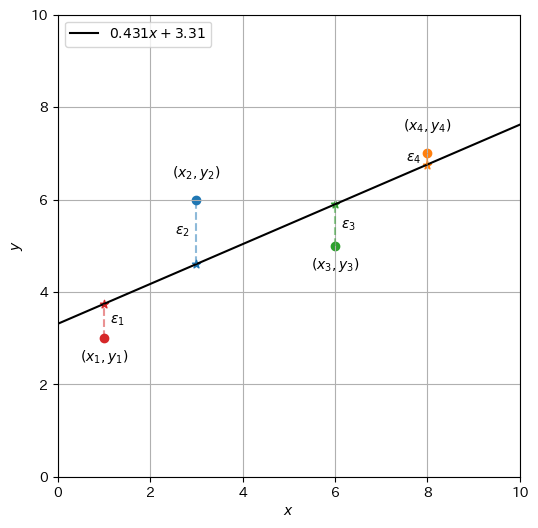

In [11]:
a, b = 0.431, 3.310
offset_y_new = [-0.5, 0.5, -0.5, 0.5]
offset_epsilon_new = [0.3, -0.3, 0.3, -0.3]

fig, ax = init_graph()
plot_data(ax, D, offset_y_new)
plot_line(ax, a, b)
plot_hat_y(ax, D, a, b, offset_hat_y, show_text=False)
plot_error(plt, ax, D, a, b, offset_epsilon_new)
plt.legend(loc='upper left')
plt.show()

## 1.6. 回帰直線の性質  

### 1.6.1. 回帰直線の傾き  

さて、最小二乗法で推定された回帰直線の傾き$a$はどのような値なのか。まず、$a$の分子である$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$について見ていきたい。


<a id="f1-26"></a>
(1.26)  

$$
\begin{align}
 \mathrm{Cov}[\mathcal{X},\mathcal{Y}] = \mathbb{E}\left[(\mathcal{X} - \mathbb{E}[\mathcal{X}])(\mathcal{Y} - \mathbb{E}[\mathcal{Y}])\right] = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})(y_i - \overline{y})
\end{align}
$$


ここで、$(x_i - \overline{x})$はデータ中の点の$x$軸の値の平均からのずれを表している。同様に、$(y_i - \overline{y})$はデータ中の点の$y$軸の値の平均からのずれを表している。ゆえに、データ中の点が以下の性質を持つとき、$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$は正に大きくなりやすい。

+ $x$軸の値が平均よりも大きい点において、$y$軸の値も平均よりも大きい
+ $x$軸の値が平均よりも小さい点において、$y$軸の値も平均よりも小さい

逆に、データ$\mathcal{D}$中の点が以下の性質を持つとき、$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$は負になりやすい。

+ $x$軸の値が平均よりも大きい点において、$y$軸の値が平均よりも小さい
+ $x$軸の値が平均よりも小さい点において、$y$軸の値が平均よりも大きい

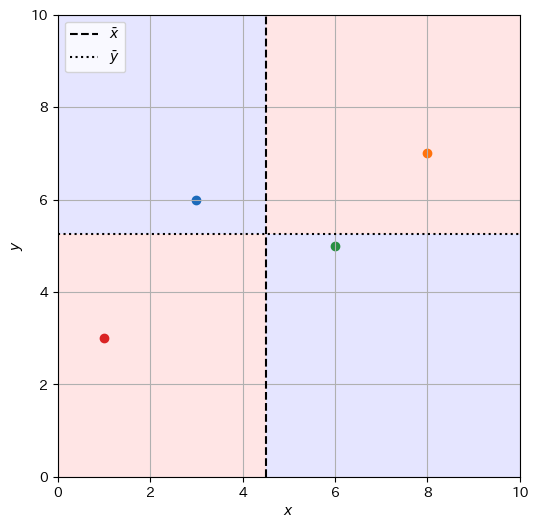

In [12]:
def draw_means(ax, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    plt.vlines([xm], xmin, xmax, "black", linestyles='dashed', label=r"$\bar{x}$")
    plt.hlines([ym], ymin, ymax, "black", linestyles='dotted', label=r"$\bar{y}$")
    
def draw_regions(ax, D):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    ax.add_patch(
         matplotlib.patches.Rectangle((0, 0), xm, ym, facecolor='red', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((xm, ym), 10-xm, 10-ym, facecolor='red', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((0, ym), xm, ym, facecolor='blue', alpha=0.1, fill=True))
    ax.add_patch(
         matplotlib.patches.Rectangle((xm, 0), 10-xm, ym, facecolor='blue', alpha=0.1, fill=True))

fig, ax = init_graph()
plot_data(ax, D)
draw_means(ax, D)
draw_regions(ax, D)
plt.legend(loc='upper left')
plt.show()

この状況をデータ$\mathcal{D}_s$に関して図示したのが上のグラフである。このデータ$\mathcal{D}_s$では$x$軸の平均値$\overline{x} = 4.5$を縦の点線で、$y$軸の平均値$\overline{y} = 5.25$を横の点線で示した。この２つの点線が交わる点$(4.5, 5.25)$をデータ$\mathcal{D}_s$の重心と呼ぶ。
さらに、$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$が正になりやすい領域を赤で、負になりやすい領域を青で示した。データ中の点が赤の領域に多く入り、かつそれらの点が重心から遠いほど、$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$の値が正になりやすい。逆に、データ中の点が青の領域に多く入り、かつそれらの点が重心から遠いほど、$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$の値が負になりやすい。このことから、データに$x$が増加すると$y$も増加する傾向があるならば共分散$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$が正になりやすく、傾き$a$の値が正となる。逆に、$x$が増加すると$y$は減少する傾向があるならば、データの共分散$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$が負になりやすく、傾き$a$の値が負になる。

このイメージをより具体的に説明したい。まず、共分散の定義を再掲する。


<a id="f1-27"></a>
(1.27)  

$$
\begin{align}
 \mathrm{Cov}[\mathcal{X},\mathcal{Y}] = \mathbb{E}\left[(\mathcal{X} - \mathbb{E}[\mathcal{X}])(\mathcal{Y} - \mathbb{E}[\mathcal{Y}])\right] = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})(y_i - \overline{y})
\end{align}
$$

ここで、$\sum$の中身はデータ中の各点における$(x_i - \overline{x})(y_i - \overline{y})$である。これは、データ中の各点$(x_i, y_i)$と重心を頂点とする長方形を考え、その面積を計算したものである。ただし、データ中の点が重心の左上もしくは右下にあるときは、面積は負の値をとると考える。このようにして計算した面積の平均を計算するのが$x$と$y$の共分散$\mathrm{Cov}[\mathcal{X},\mathcal{Y}]$である。

![covariance](fig/cov-annotated.png "共分散")

続いて$a$の分母を説明する。これは、$x$の分散$\mathrm{Var}[\mathcal{X}]$である。


<a id="f1-28"></a>
(1.28)  

$$
\begin{align}
 \mathrm{Var}[\mathcal{X}] = \mathrm{Cov}[\mathcal{X}, \mathcal{X}] = \mathbb{E}\left[(\mathcal{X} - \mathbb{E}[\mathcal{X}])(\mathcal{X} - \mathbb{E}[\mathcal{X}])\right] = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2
\end{align}
$$

ここで、$\sum$の中身はデータ中の各点における$(x_i - \overline{x})^2$である。これは、データ中の各点に対して、重点を頂点として一辺の長さが$|x_i - \overline{x}|$の正方形を考え、その面積を計算したものである。このようにして計算した各点の面積の平均を計算するのが$x$の分散$\mathrm{Var}[\mathcal{X}]$である。


![covariance](fig/var-annotated.png "分散")


回帰直線の傾き$a$は、$x$と$y$の共分散の大きさを$x$の分散の値で割ったものであるから、以下のような計算を行っているとイメージするとよい。

![covariance](fig/slope.png "回帰直線の傾きの計算")



### 1.6.2. 目的変数の推定値$\hat{y}$の平均値は観測値$y$の平均に等しい

式[(1.15)](#f1-15)は何を表しているのだろうか。この式を目的変数の平均値$\overline{y}$を表す式に書き直して整理すると、目的変数の推定値の平均値$\overline{\hat{y}}$と等しくなることが分かる。


<a id="f1-29"></a>
(1.29)  

$$
\begin{align}
\overline{y} &= a \overline{x} + b \\
&= a \frac{1}{N} \sum_{i=1}^N x_i + b \\
&= \frac{1}{N} \sum_{i=1}^N a x_i + \frac{1}{N} \sum_{i=1}^N b \\
&= \frac{1}{N} \sum_{i=1}^N (a x_i + b) \\
&= \frac{1}{N} \sum_{i=1}^N \hat{y}_i \\
&= \overline{\hat{y}}
\end{align}
$$


ゆえに、目的変数の推定値$\hat{y}$の平均値は観測値$y$の平均に等しい。ここで、$a\overline{x}$はデータ$\mathcal{D}$の説明変数の平均値$\overline{x}$を回帰係数$a$で$y$軸の値に変換している。説明変数のデータを回帰係数$a$で目的変数の空間に写像したとき、目的変数の推定値の平均$\overline{\hat{y}}$が観測値の平均$\overline{y}$に等しくなるように、バイアスを調整するのが$b$である。

### 1.6.3. 回帰直線は観測データの重心を通る

これまでの議論の中で、回帰直線はデータ$\mathcal{D}$の重心を「中心」と考えて$x$と$y$の対応付けを考えていることが分かる。実際、$x = \overline{x}$として目的変数の推定値$\hat{y}$を求めると、式[(1.15)](#f1-15)より、


<a id="f1-30"></a>
(1.30)  

$$
\begin{align}
\hat{y} = a\overline{x} + b = a\overline{x} + (\overline{y} - a\overline{x}) = \overline{y}
\end{align}
$$


となることから、回帰直線は重心$(\overline{x}, \overline{y})$を通ることが確認できる。



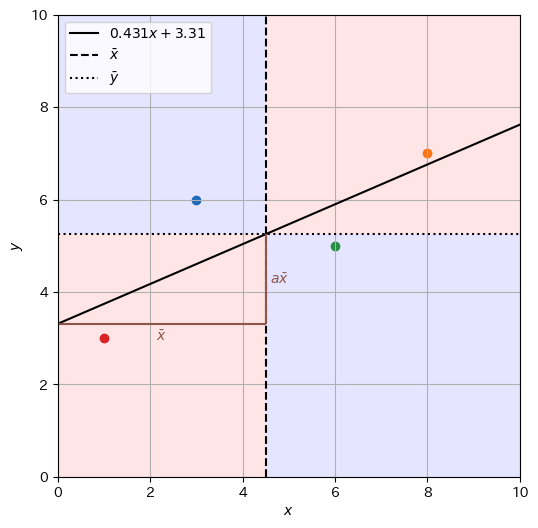

In [13]:
def draw_slope(ax, D, b):
    xm = np.mean(D[:,0])
    ym = np.mean(D[:,1])
    plt.hlines([b], 0, xm, "tab:brown")
    plt.vlines([xm], b, ym, "tab:brown")
    plt.text(xm / 2, b - 0.1, "$\\bar{x}$", color="tab:brown", va='top', ha='center')
    plt.text(xm + 0.1, b + (ym - b) / 2, "$a\\bar{x}$", color="tab:brown", va='center', ha='left')

a, b = 0.431, 3.310
fig, ax = init_graph()
plot_data(ax, D)
plot_line(ax, a, b)
draw_means(ax, D)
draw_regions(ax, D)
draw_slope(ax, D, b)
plt.legend(loc='upper left')
plt.show()

### 1.6.4. 残差の和および平均は$0$  

以下の計算により、残差の和および平均は$0$であることが分かる。


<a id="f1-31"></a>
(1.31)  

$$
\begin{align}
\overline{\epsilon} &= \frac{1}{N}\sum_{i=1}^N \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i) \\
&= \frac{1}{N}\sum_{i=1}^N (y_i - ax_i - b) \\
&= 0 
\end{align}
$$

なお、下から2行目が$0$に等しいことは、式[(1.13)](#f1-13)による。  



### 1.6.5. 説明変数と残差には相関がない

説明変数と残差の共分散を計算してみる。残差の和および平均は$0$であることに注意すると、


<a id="f1-32"></a>
(1.32)  

$$
\begin{align}
\mathrm{Cov}[\mathcal{X},\mathcal{E}] &= \frac{1}{N}\sum_{i=1}^N (x_i - \overline{x}) (\epsilon_i - \overline{\epsilon}) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i - \overline{x}) \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N x_i  \epsilon_i - \frac{1}{N}\sum_{i=1}^N  \overline{x} \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N x_i  \epsilon_i - \overline{x}\cdot\underbrace{\frac{1}{N}\sum_{i=1}^N  \epsilon_i}_{0} \\
&= \frac{1}{N}\sum_{i=1}^N x_i  \epsilon_i
\end{align}
$$


なお、下から2行目の第二項が$0$に等しいことは、式[(1.31)](#f1-31)による。さらに、


<a id="f1-33"></a>
(1.33)  

$$
\frac{1}{N}\sum_{i=1}^N x_i  \epsilon_i
= \frac{1}{N}\sum_{i=1}^N x_i (y_i - \hat{y}_i)
= \frac{1}{N}\sum_{i=1}^N x_i (y_i - ax_i - b)
= 0
$$

であるから、$\mathrm{Cov}[\mathcal{X},\mathcal{E}] = 0$が言える。すなわち、説明変数と残差の共分散が$0$になることから、説明変数と残差は無相関（無関係）であることが分かる。なお、最後の式展開は、式[(1.17)](#f1-17)による。

### 1.6.6. 目的変数の推定値$\hat{y}$と残差には相関がない

目的変数の推定値$\hat{y}$と残差の共分散を計算してみる。残差の和および平均は$0$であること、式[(1.33)](#f1-33)を踏まえると、


<a id="f1-34"></a>
(1.34)  

$$
\begin{align}
\mathrm{Cov}[\hat{\mathcal{Y}},\mathcal{E}] &= \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - \overline{\hat{y}}) (\epsilon_i - \overline{\epsilon}) \\
&= \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - \overline{\hat{y}}) \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \epsilon_i - \overline{\hat{y}} \cdot \underbrace{\frac{1}{N}\sum_{i=1}^N \epsilon_i}_{0} \\
&= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N (ax_i + b) \epsilon_i \\
&= a \cdot \underbrace{\frac{1}{N}\sum_{i=1}^N x_i \epsilon_i}_{0} + b \cdot \underbrace{\frac{1}{N}\sum_{i=1}^N \epsilon_i}_{0} \\
&= 0
\end{align}
$$


であるから、$\mathrm{Cov}[\hat{\mathcal{Y}},\mathcal{E}] = 0$が言える。すなわち、目的変数の推定値と残差の共分散が0になることから、目的変数の推定値と残差は無相関（無関係）であることが分かる。なお、最後の式展開は、式[(1.33)](#f1-33)と式[(1.31)](#f1-31)による。  



## 1.7. 決定係数  

目的変数の観測値の分散$\mathrm{Var}[\mathcal{Y}]$は目的変数の推定値の分散$\mathrm{Var}[\hat{\mathcal{Y}}]$と残差の分散$\mathrm{Var}[\mathcal{E}]$の和で表されることを示す。


<a id="f1-35"></a>
(1.35)  

$$
\begin{align}
\mathrm{Var}[\mathcal{Y}] &= \frac{1}{N} \sum_{i=1}^N (y_i - \overline{y})^2 \\
&= \frac{1}{N} \sum_{i=1}^N \{(\hat{y}_i + \epsilon_i) - \overline{y}\}^2 \\
&= \frac{1}{N} \sum_{i=1}^N \{(\hat{y}_i  - \overline{y}) + \epsilon_i\}^2 \\
&= \frac{1}{N} \sum_{i=1}^N (\hat{y}_i  - \overline{y})^2 + \frac{1}{N} \sum_{i=1}^N 2 (\hat{y}_i  - \overline{y}) \epsilon_i + \frac{1}{N} \sum_{i=1}^N \epsilon_i^2 \\
&= \mathrm{Var}[\hat{\mathcal{Y}}] + 2 \cdot \underbrace{\frac{1}{N} \sum_{i=1}^N \hat{y}_i \epsilon_i}_{0} - 2\overline{y} \cdot \underbrace{\frac{1}{N} \sum_{i=1}^N \epsilon_i}_{0} + \mathrm{Var}[\mathcal{E}] \\
&= \mathrm{Var}[\hat{\mathcal{Y}}] + \mathrm{Var}[\mathcal{E}]
\end{align}
$$


なお、下から2行目において、第２項は式[(1.34)](#f1-34)の導出過程、第３項は式[(1.31)](#f1-31)より$0$であることを利用した。

ここで、以下の用語を整理する。

+ **全変動**: 目的変数の観測値の分散$\mathrm{Var}[\mathcal{Y}]$（データの変動）
+ **回帰変動**: 目的変数の推定値の分散$\mathrm{Var}[\hat{\mathcal{Y}}]$（モデルの変動）
+ **残差変動**: 残差の分散$\mathrm{Var}[\mathcal{E}]$（モデルが説明しきれなかった変動）

すると、先ほどの式は「**全変動は回帰変動と残差変動の和で表される**」という関係を表している。

データの全変動のうち、回帰によって表現できた回帰変動の割合を**決定係数**とよび、次式で定義する。


---

### 【ポイント】 決定係数  


<a id="f1-36"></a>
(1.36)  

$$
\begin{align}
R^2 = \frac{\mathrm{Var}[\hat{\mathcal{Y}}]}{\mathrm{Var}[\mathcal{Y}]} = \frac{\mathrm{Var}[\mathcal{Y}] - \mathrm{Var}[\mathcal{E}]}{\mathrm{Var}[\mathcal{Y}]} = 1 - \frac{\mathrm{Var}[\mathcal{E}]}{\mathrm{Var}[\mathcal{Y}]}
\end{align}
$$


---

決定係数は$[0,1]$の範囲の値ととり、データがモデル（単回帰の場合は直線）によく当てはまるときは$1$に近くなる。  



## 1.8. 単回帰の実施例  

冒頭の最高気温とアイスクリーム・シャーベットの支出額のデータに対して、単回帰を行う例を示す。このJupyter Notebookの冒頭でデータを`icecream_data`という変数に格納してあったので、説明変数（最高気温）`X`と目的変数（支出額）を`Y`に分離する。

In [14]:
X, Y = icecream_data

`X`には最高気温が配列（`numpy.array`）に格納されている。

In [15]:
X

array([ 9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
       11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
       16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
       23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
       26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
       30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
       29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
       26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
       24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
       19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
       16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

`Y`にはアイスクリーム・シャーベットの売上高が配列（`numpy.array`）に格納されている。

In [16]:
Y

array([ 463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
        542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
       1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
        683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
        404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
        739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
       1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
        611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
        506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
        716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
       1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
        745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
        549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
        784.,  682.,  587.])

以下はグラフを書くためのプログラムである。

In [17]:
def show_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
    ax.set_xlabel('最高気温の月平均（℃）')
    ax.set_ylabel('支出額（円）')
    ax.set_xlim(0, 35)
    ax.set_ylim(-250, 2000)
    ax.grid()
    fig.show()

### 1.8.1. numpy.polyfit

[numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)関数を用いると、線形回帰モデルのパラメータを求めることができる。単回帰の場合は、3番目の引数（次元数）に1を指定する。  


【補足】  
返却値：`array([a, b])`  
- a：傾き  
- b：切片  


In [18]:
W = np.polyfit(X, Y, 1)
W

array([38.46344295, -8.26568744])

$0$から$35$までに等間隔に配置した$100$個の数値`x`に対して、目的変数の推定値`y_hat`を求めるため、[numpy.polyval](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html)関数を呼び出し、回帰直線を描画する。

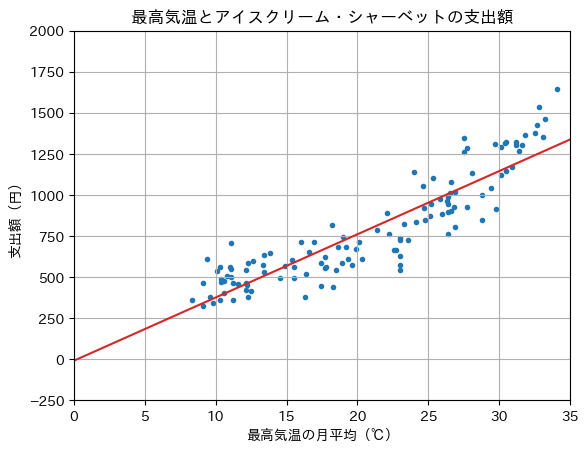

In [19]:
x = np.linspace(0, 35, 100)
y_hat = np.polyval(W, x)
show_graph(X, Y, x, y_hat)

### 1.8.2. sklearn.linear_model.LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)クラスを用いても、線形回帰を容易に実行できる。訓練データにフィッティングさせるには、[fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)関数を呼び出せばよいが、説明変数のデータとして、事例数を行数、目的変数の数を列数とした行列形式で与えることになっているので、`X`の形状を変更する。  


【補足】  
- sklearn：正式名称はScikit-learn(サイキット・ラーン)、デファクトスタンダードな機械学習ライブラリ  
- `reshape(-1, 1)`：n行(-1を指定 → 自動算出)、1列 の配列に変更  

In [21]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)

LinearRegression()

回帰直線の係数（傾き）を表示する。

In [22]:
reg.coef_

array([38.46344295])

回帰直線の切片を表示する。

In [23]:
reg.intercept_

-8.265687440297484

決定係数を求めるため、[score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)関数を呼び出す。

In [24]:
reg.score(X.reshape(-1, 1), Y)

0.8123821444273189

$0$から$35$までに等間隔に配置した$100$個の数値`x`に対して、目的変数の推定値`y_hat`を求めるため、[predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)関数を呼び出し、回帰直線を描画する。

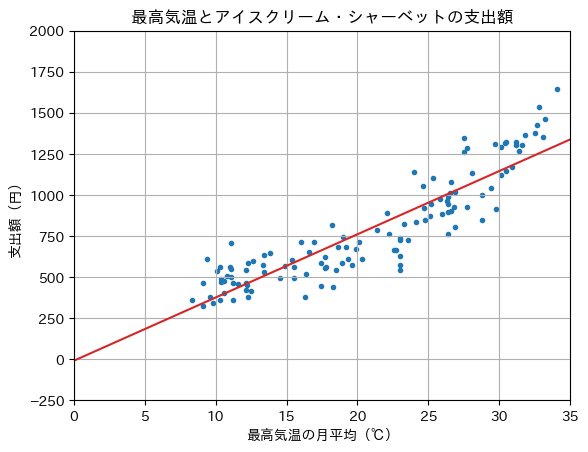

In [25]:
x = np.linspace(0, 35, 100)
y_hat = reg.predict(x.reshape(-1, 1))
show_graph(X, Y, x, y_hat)

## 1.9. 確認問題  

以下のデータ$\mathcal{D}_s$に対して単回帰分析を行うプログラムを実装せよ。

In [26]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]
X, Y

(array([1, 3, 6, 8]), array([3, 6, 5, 7]))

なお、NumPy, SciPy, scikit-learn, statsmodel等のライブラリには回帰分析を行う便利な関数がある（下記参照）が、ここでは使わずに本資料で説明した式をプログラムとして表現すること。

+ [np.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), [np.polynomial.polynomial.Polynomial.fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit)
+ [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html), [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
+ [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
+ [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

**(1) 単回帰の実装**

$\mathcal{D}_s$に対して単回帰を行うプログラムを実装し、回帰直線$\hat{y}=ax+b$の係数$a$と$b$の値を求めよ

【補足】  
回帰直線の式：y=ax + b  
- 回帰係数(傾き)：a = xとyの共分散 / xの分散  
- 切片：b = yの平均-(a × xの平均)  

---

- `np.cov(X,Y)` ：分散・共分散を求める関数  
- Xの分散：xvar  
- Yの分散：yvar  
- XYの共分散：sxy  


In [27]:
X.var(), Y.var()

(7.25, 2.1875)

In [28]:
v = np.cov(X,Y,ddof=0)
xvar = v[0,0]
yvar = v[1,1]
sxy = v[0, 1]
v, xvar, yvar, sxy

(array([[7.25  , 3.125 ],
        [3.125 , 2.1875]]),
 7.25,
 2.1875,
 3.125)

- a, b の値  

In [29]:
a = sxy/xvar
xmean = X.mean()
ymean = Y.mean()
b = ymean - (a * xmean)
a, b

(0.43103448275862066, 3.3103448275862073)

- a,bの値を検証  
  `assert_allclose()` ：値がほぼ同じ場合は何も表示しない、差がある場合は`AssertionError`  

In [30]:
ans_b, ans_a = np.linalg.lstsq(np.vstack([np.ones(len(X)), X]).T, Y, rcond=None)[0]
ans_a, ans_b

(0.4310344827586211, 3.310344827586206)

In [31]:
np.testing.assert_allclose((a, b), (ans_a, ans_b))

In [32]:
W = np.polyfit(X, Y, 1)
W

array([0.43103448, 3.31034483])

In [33]:
np.testing.assert_allclose((a, b), (W[0], W[1]))

**(2) 回帰直線の描画**

単回帰の実装で求めた回帰直線をデータ点とともにグラフに描け  

---

【補足】  
- データ点は散布図で記載：`plt.scatter(X, Y)`  
- 回帰直線  
  - 数式：`y = a * x + b`  
  - グラフ描画：`plt.plot(x, y)`、線・座標の2つ作成  

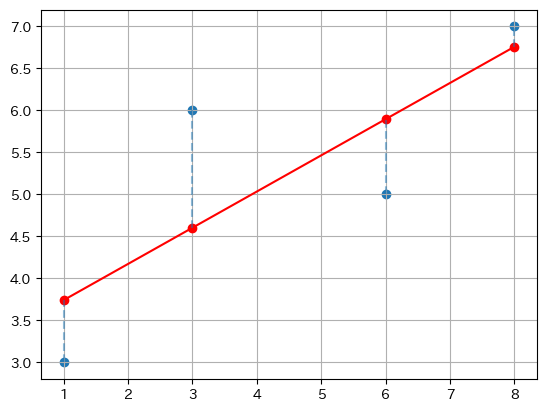

In [34]:
plt.scatter(X, Y)
y_hat = (a * X) + b
plt.plot(X, y_hat, 'r')
plt.plot(X, y_hat, 'ro')
for i, row in enumerate(D):
    x, y = row
    v = (a * x) + b
    ymin = min(y, v)
    ymax = max(y, v)
    plt.vlines([x], ymin, ymax, linestyles='dashed', alpha=0.5)
plt.grid()

**(3) 残差の計算**

各事例$(x_i, y_i)$に対して残差$\hat{\epsilon}_i$を求めよ

In [35]:
Y_hat = np.empty(0)
E = np.empty(0)

for i, row in enumerate(D):
    row_x, row_y = row
    y_hat = a * row_x + b
    Y_hat = np.append(Y_hat, y_hat)
    print('\nx = ' + str(row_x) + ', y = ' + str(row_y) + ', y_hat = ' + str(y_hat))
    e = row_y - y_hat
    E = np.append(E, e)
    print('e = ' + str(e))

print('\nY_hat = ' + str(Y_hat))
print('E = ' + str(E))


x = 1, y = 3, y_hat = 3.741379310344828
e = -0.7413793103448278

x = 3, y = 6, y_hat = 4.603448275862069
e = 1.3965517241379306

x = 6, y = 5, y_hat = 5.8965517241379315
e = -0.8965517241379315

x = 8, y = 7, y_hat = 6.758620689655173
e = 0.2413793103448274

Y_hat = [3.74137931 4.60344828 5.89655172 6.75862069]
E = [-0.74137931  1.39655172 -0.89655172  0.24137931]


**(4) 説明変数と残差の共分散**

説明変数(X)と残差(E)の共分散を求めよ  

In [36]:
v = np.cov(X,E,ddof=0)
Xvar = v[0,0]
Evar = v[1,1]
sXE = v[0, 1]
print('Covariance = ' + str(np.around(sXE,10)))
v

Covariance = 0.0


array([[7.25000000e+00, 1.38777878e-17],
       [1.38777878e-17, 8.40517241e-01]])

- 共分散は理論上0 (ほぼ0) になることを確認  

In [37]:
np.testing.assert_almost_equal(sXE, 0)

**(5) 目的変数の推定値と残差の共分散**

目的変数(Y)の推定値(Y_hat)と残差(E)の共分散を求めよ  

In [38]:
v = np.cov(Y_hat,E,ddof=0)
Y_hatvar = v[0,0]
Evar = v[1,1]
sY_hatvarE = v[0, 1]
print('Covariance = ' + str(np.around(sY_hatvarE,10)))
v

Covariance = 0.0


array([[1.34698276e+00, 3.52555216e-17],
       [3.52555216e-17, 8.40517241e-01]])

- 共分散は理論上0 (ほぼ0) になることを確認  

In [39]:
np.testing.assert_almost_equal(sY_hatvarE, 0)

**(6) 決定係数**

決定係数（$R^2$）を求めよ

In [40]:
r2 = Y_hatvar / yvar
r2

0.6157635467980295

- 値を検証  

In [41]:
from sklearn.metrics import r2_score

ans_r2 = r2_score(Y, Y_hat)
ans_r2

0.6157635467980296

In [42]:
np.testing.assert_almost_equal(r2, ans_r2)

---

[機械学習帳](https://chokkan.github.io/mlnote/) © Copyright 2020-2022 by [岡崎 直観 (Naoaki Okazaki)](https://www.chokkan.org/). この作品は<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">クリエイティブ・コモンズ 表示 - 非営利 - 改変禁止 4.0 国際 ライセンス</a>の下に提供されています。 <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/80x15.png" /></a>　ただし、作品中のコードセル部分は<a rel="license" href="https://opensource.org/licenses/MIT">MITライセンス</a>の下に提供されています。